In [1]:
import matplotlib.pyplot as plt
import scipy.stats as scs
import numpy as np
import json

plt.style.use('seaborn-whitegrid')
plt.style.use('tableau-colorblind10')
params = {'legend.fontsize': 'xx-large',
          'figure.figsize': (6.75, 5),
          'figure.dpi': 300,
          'lines.linewidth': 3.0,
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large',
          'legend.fontsize': 'xx-large',
         'font.size': 11,
          'font.family': 'serif',
          "mathtext.fontset": "dejavuserif",
         'axes.titlepad': 12,
        'axes.labelpad': 12}
plt.rcParams.update(params)

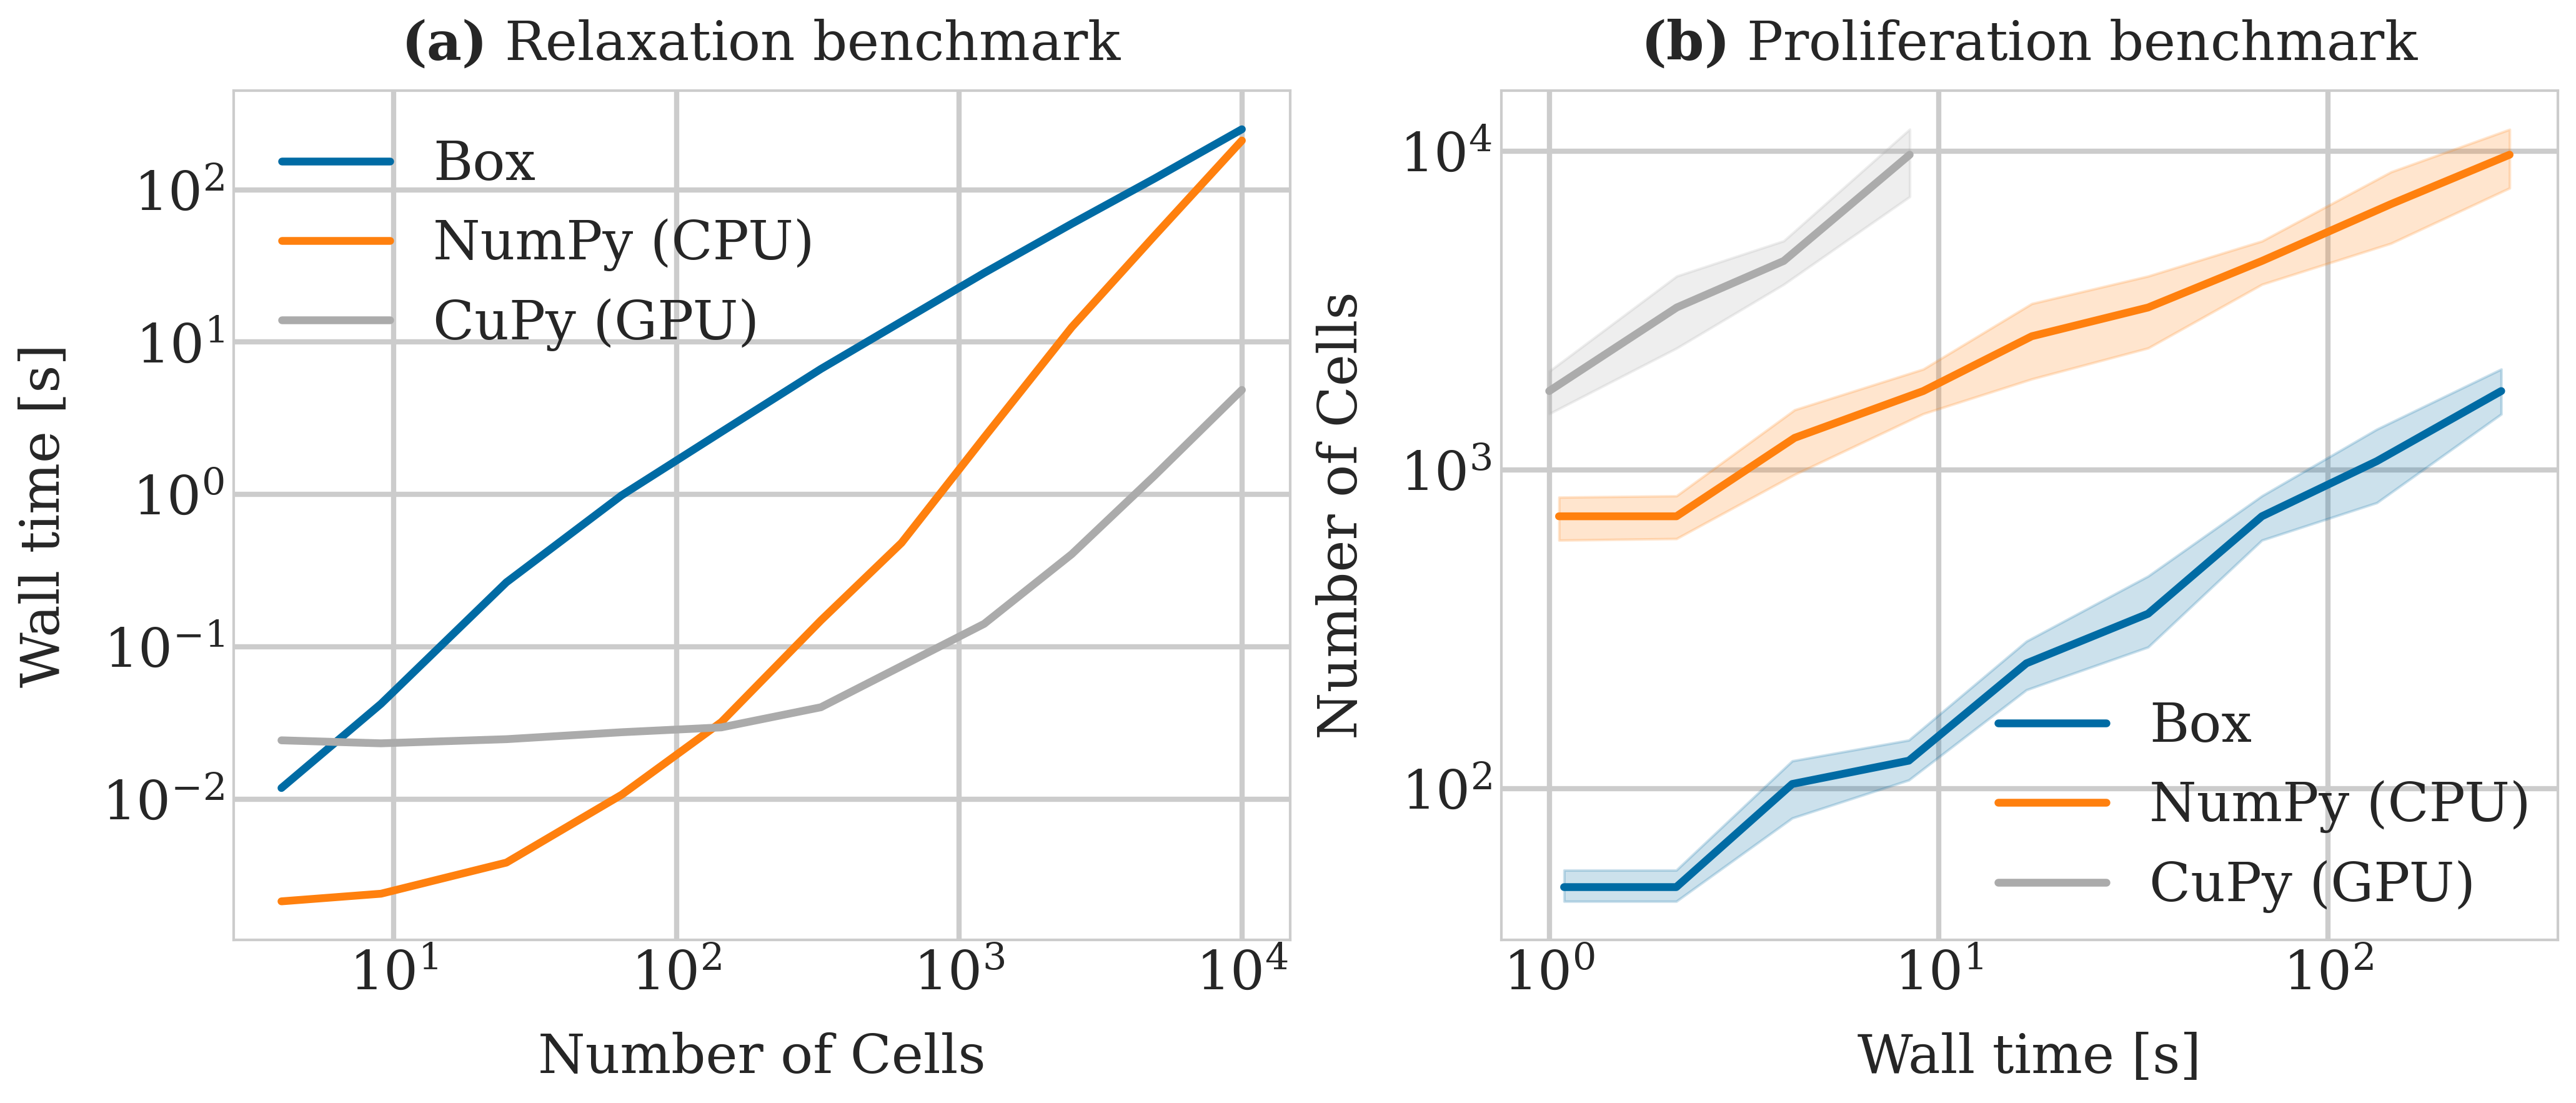

In [4]:
import matplotlib.pyplot as plt
import scipy.stats as scs
import numpy as np
import json
import seaborn as sns
import pandas as pd

plt.style.use('seaborn-whitegrid')
plt.style.use('tableau-colorblind10')
params = {'legend.fontsize': 'xx-large',
          'figure.figsize': (6.75, 5),
          'figure.dpi': 300,
          'lines.linewidth': 3.0,
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large',
          'legend.fontsize': 'xx-large',
         'font.size': 12,
          'font.family': 'serif',
          "mathtext.fontset": "dejavuserif",
         'axes.titlepad': 12,
        'axes.labelpad': 12}
plt.rcParams.update(params)

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16, 6))

with open('relaxation_benchmark_snowy.json', 'r') as f:
    relaxation_data = {int(k): v for k, v in json.load(f).items()}
n_cells = sorted(relaxation_data.keys())
t = {
    alg: [np.mean(relaxation_data[n][alg]) for n in n_cells]
    for alg in relaxation_data[n_cells[0]]
}

t_err = {
    alg: [np.std(relaxation_data[n][alg]) for n in n_cells]
    for alg in relaxation_data[n_cells[0]]
}

labels = {
    'box': 'Box',
    'np': 'NumPy (CPU)',
    'cp': 'CuPy (GPU)',
}

for i, alg in enumerate(t):
    ax1.plot(n_cells, t[alg], mew=2, ms=10, label=labels[alg])


ax1.set(xlabel='Number of Cells')
ax1.set(ylabel='Wall time [s]')
ax1.set_title(r'$\bf{(a)}$ Relaxation benchmark')

ax1.set(yscale='log')
ax1.set(xscale='log')

ax1.grid(True, 'major', linewidth=2)

ax1.legend(loc=0)

labels = {
    'box': 'Box',
    'np': 'NumPy (CPU)',
    'cp': 'CuPy (GPU)',
}

input_file = 'proliferation_benchmark_snowy_exact_0.1_1.0.json'

with open(input_file, 'r') as f:
    data = json.load(f)
    
    
for i, alg in enumerate(data):
    x = [t for (t, n_cells, n_steps) in data[alg]]
    x_cp = x[:]
        
    for i in range(len(x)):
        x[i] = np.mean(x_cp[5*(i//5):5*(i//5) + 5])
               
    y = [n_cells for (t, n_cells, n_steps) in data[alg]]
    df = pd.DataFrame(data={'time': x, 'n_cells': y})
        
    sns.lineplot(data=df, x='time', y='n_cells', ax=ax2, label=labels[alg])
    
    #plt.scatter(y, x)

ax2.set(xlabel='Wall time [s]')
ax2.set(ylabel='Number of Cells')
ax2.set_title(r'$\bf{(b)}$ Proliferation benchmark')

ax2.set(yscale='log')
ax2.set(xscale='log')


ax2.grid(True, 'major', linewidth=2)

ax2.legend(loc=0, borderpad=0)
#plt.tight_layout()

plt.savefig("Figure2.pdf", bbox_inches='tight')